# TASK4
The goal of this subtask is to develop your own model and use it to learn the sine function on the interval [0, 2π]. Discretize the interval with a suitable number of points (of your choice) and use the values of the sine function at these discretization points as labels.

<a id="0"></a>
1. [Data preparation](#1)
2. [Ansatz](#2)
3. [Training](#3)
4. [Experiment 1](#4)
5. [Experiment 2](#5)

<a id="1"></a>
## Data preparation
Let's start by generating training and test data.
This function generates a dataset to learn the sine function over the interval $[0,2\pi]$. It discretizes the interval into `num_points` points, computes the sine of these points, shuffles the points, and then splits them into training and testing sets based on the `test_split=0.2` proportion.

In [5]:
from modules.utils import create_data_sin_function

X_train, Y_train, X_test, Y_test = create_data_sin_function(1000)

Y_train: Length: 800
Y_test: Length: 200


<a id="2"></a>
## Ansatz

(<Figure size 600x200 with 1 Axes>, <Axes: >)

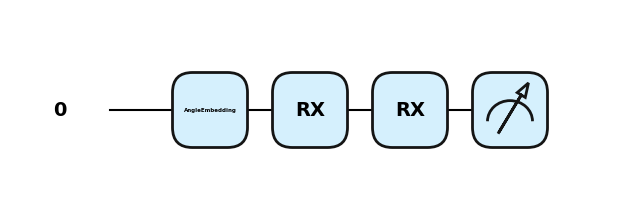

In [6]:
import pennylane as qml
from pennylane import numpy as np

dev = qml.device('default.qubit', wires=1)
@qml.qnode(dev)
def quantum_circuit(x,weights):
    # Encoding
    qml.AngleEmbedding(x, wires=[0])
    # Ansatz
    qml.RX(weights[0], wires=0)
    qml.RX(weights[1], wires=0)
    return qml.expval(qml.PauliZ(wires=0))


weights = [0.2,0.3]
x_input = [0.2]
quantum_circuit(x_input,weights)
qml.draw_mpl(quantum_circuit,style='pennylane')(x_input,weights)

<a id="3"></a>
## Training
we are using loss function:
* MSE- mean squared_error

In [6]:
import pennylane as qml
import pennylane.numpy as np
from modules.training import cost_MSE, training
from modules.utils import create_data_sin_function

X_train, Y_train, X_test, Y_test = create_data_sin_function(1000)

num_epochs = 30
opt = qml.GradientDescentOptimizer(stepsize=0.1)
init_params = np.array([0.1, 0.1], requires_grad=True)

final_params,costs = training(num_epochs, opt, cost_MSE,init_params, X_train, Y_train)

Y_train: Length: 800
Y_test: Length: 200
Epoch: 0 | Cost: 1.0195956
Epoch: 1 | Cost: 0.7987311
Epoch: 2 | Cost: 0.5963290
Epoch: 3 | Cost: 0.4268439
Epoch: 4 | Cost: 0.2954775
Epoch: 5 | Cost: 0.1996152
Epoch: 6 | Cost: 0.1326374
Epoch: 7 | Cost: 0.0871983
Epoch: 8 | Cost: 0.0569517
Epoch: 9 | Cost: 0.0370542
Epoch: 10 | Cost: 0.0240570
Epoch: 11 | Cost: 0.0156017
Epoch: 12 | Cost: 0.0101134
Epoch: 13 | Cost: 0.0065551
Epoch: 14 | Cost: 0.0042490
Epoch: 15 | Cost: 0.0027547
Epoch: 16 | Cost: 0.0017862
Epoch: 17 | Cost: 0.0011585
Epoch: 18 | Cost: 0.0007515
Epoch: 19 | Cost: 0.0004876
Epoch: 20 | Cost: 0.0003164
Epoch: 21 | Cost: 0.0002054
Epoch: 22 | Cost: 0.0001333
Epoch: 23 | Cost: 0.0000865
Epoch: 24 | Cost: 0.0000562
Epoch: 25 | Cost: 0.0000365
Epoch: 26 | Cost: 0.0000237
Epoch: 27 | Cost: 0.0000154
Epoch: 28 | Cost: 0.0000100
Epoch: 29 | Cost: 0.0000065
Final parameters:  [-0.78357105 -0.78357105]


<a id="4"></a>
### Experiment 1

Cost (MSE) for training set: 0.0000060
Cost (MSE) for test set: 0.0000064


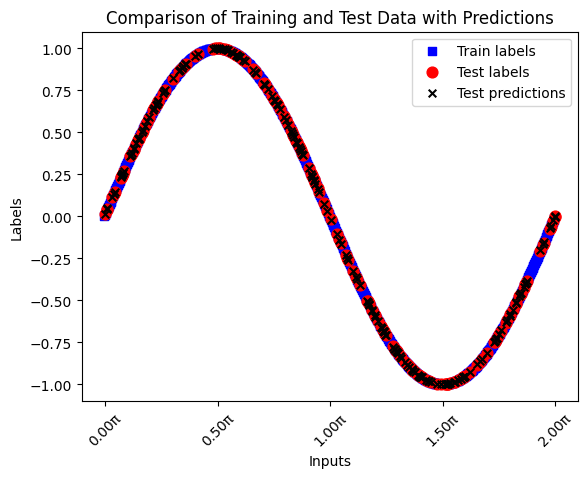

In [3]:
from modules.utils import plot_result
from modules.training import compute_predictions, cost_MSE

test_cost = cost_MSE(final_params, X_test, Y_test)
print(f"Cost (MSE) for training set: {costs[-1]:0.7f}")
print(f"Cost (MSE) for test set: {test_cost:0.7f}")
test_predictions = compute_predictions(X_test, final_params)

plot_result(X_test,Y_test, test_predictions,X_train,Y_train)

The plot visualizes the comparison between the training data, test data, and the predictions made by a Variational Quantum Circuit (VQC) for a regression problem where the goal is to predict the sine function.
* X-axis (Inputs): Represents the input values scaled in radians.
* Y-axis (Labels): Represents the corresponding sine values for the input values.

The plot and the provided MSE values indicate that the VQC model has successfully learned the sine function, showing high accuracy and good generalization to the test data. This demonstrates the potential of quantum machine learning models for regression tasks, particularly in capturing complex functions like the sine wave. Further analysis and comparison with classical models will provide a more comprehensive understanding of the VQC's capabilities and advantages.

Adjustment of number points

In [7]:
import pennylane as qml
import pennylane.numpy as np
from modules.training import cost_MSE, training
from modules.utils import create_data_sin_function

X_train, Y_train, X_test, Y_test = create_data_sin_function(100)

num_epochs = 30
opt = qml.GradientDescentOptimizer(stepsize=0.1)
init_params = np.array([0.1, 0.1], requires_grad=True)

final_params,costs = training(num_epochs, opt, cost_MSE,init_params, X_train, Y_train)

Y_train: Length: 80
Y_test: Length: 20
Epoch: 0 | Cost: 1.0453080
Epoch: 1 | Cost: 0.8536150
Epoch: 2 | Cost: 0.6623980
Epoch: 3 | Cost: 0.4880488
Epoch: 4 | Cost: 0.3428534
Epoch: 5 | Cost: 0.2315116
Epoch: 6 | Cost: 0.1517303
Epoch: 7 | Cost: 0.0973995
Epoch: 8 | Cost: 0.0616842
Epoch: 9 | Cost: 0.0387415
Epoch: 10 | Cost: 0.0242134
Epoch: 11 | Cost: 0.0150921
Epoch: 12 | Cost: 0.0093935
Epoch: 13 | Cost: 0.0058428
Epoch: 14 | Cost: 0.0036335
Epoch: 15 | Cost: 0.0022595
Epoch: 16 | Cost: 0.0014053
Epoch: 17 | Cost: 0.0008741
Epoch: 18 | Cost: 0.0005438
Epoch: 19 | Cost: 0.0003384
Epoch: 20 | Cost: 0.0002106
Epoch: 21 | Cost: 0.0001311
Epoch: 22 | Cost: 0.0000816
Epoch: 23 | Cost: 0.0000508
Epoch: 24 | Cost: 0.0000316
Epoch: 25 | Cost: 0.0000197
Epoch: 26 | Cost: 0.0000123
Epoch: 27 | Cost: 0.0000076
Epoch: 28 | Cost: 0.0000048
Epoch: 29 | Cost: 0.0000030
Final parameters:  [-0.78421355 -0.78421355]


Cost (MSE) for training set: 0.0000030
Cost (MSE) for test set: 0.0000023


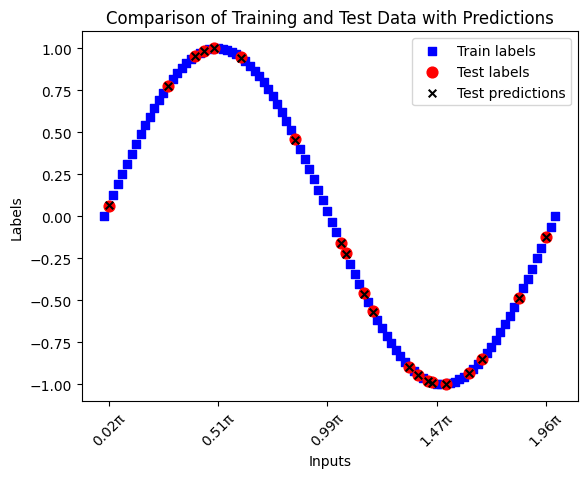

In [8]:
from modules.utils import plot_result
from modules.training import compute_predictions, cost_MSE

test_cost = cost_MSE(final_params, X_test, Y_test)
print(f"Cost (MSE) for training set: {costs[-1]:0.7f}")
print(f"Cost (MSE) for test set: {test_cost:0.7f}")
test_predictions = compute_predictions(X_test, final_params)

plot_result(X_test,Y_test, test_predictions,X_train,Y_train)

Y_train: Length: 800
Y_test: Length: 200
Cost (MSE) for the interval [2π,7π]: 0.0000029


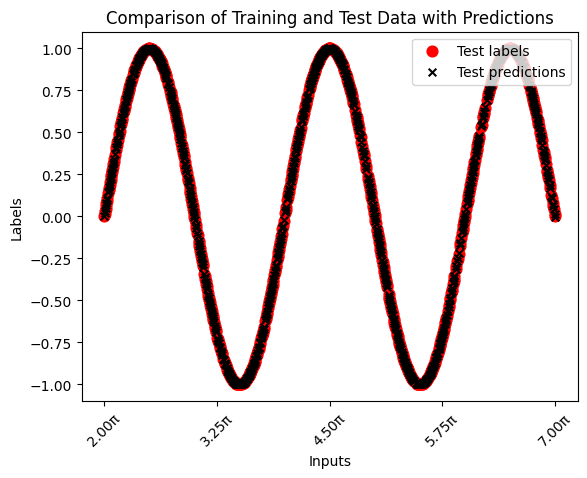

In [9]:
X_test_2, Y_test_2,_,_ = create_data_sin_function(1000,start= 2 * np.pi,stop = 7 * np.pi)
predictions = compute_predictions(X_test_2, final_params)
test_cost = cost_MSE(final_params, X_test_2, Y_test_2)
print(f"Cost (MSE) for the interval [2π,7π]: {test_cost:0.7f}")
plot_result(X_test_2,Y_test_2, predictions)

In [10]:
import pennylane as qml
import pennylane.numpy as np
from modules.training import cost_MSE, training
from modules.utils import create_data_sin_function

X_train, Y_train, X_test, Y_test = create_data_sin_function(50)

num_epochs = 30
opt = qml.GradientDescentOptimizer(stepsize=0.1)
init_params = np.array([0.1, 0.1], requires_grad=True)

final_params,costs = training(num_epochs, opt, cost_MSE,init_params, X_train, Y_train)

Y_train: Length: 40
Y_test: Length: 10
Epoch: 0 | Cost: 0.9977967
Epoch: 1 | Cost: 0.7859761
Epoch: 2 | Cost: 0.5927247
Epoch: 3 | Cost: 0.4300787
Epoch: 4 | Cost: 0.3023797
Epoch: 5 | Cost: 0.2075352
Epoch: 6 | Cost: 0.1399713
Epoch: 7 | Cost: 0.0932585
Epoch: 8 | Cost: 0.0616229
Epoch: 9 | Cost: 0.0404953
Epoch: 10 | Cost: 0.0265154
Epoch: 11 | Cost: 0.0173210
Epoch: 12 | Cost: 0.0112978
Epoch: 13 | Cost: 0.0073620
Epoch: 14 | Cost: 0.0047944
Epoch: 15 | Cost: 0.0031211
Epoch: 16 | Cost: 0.0020313
Epoch: 17 | Cost: 0.0013219
Epoch: 18 | Cost: 0.0008601
Epoch: 19 | Cost: 0.0005596
Epoch: 20 | Cost: 0.0003641
Epoch: 21 | Cost: 0.0002369
Epoch: 22 | Cost: 0.0001541
Epoch: 23 | Cost: 0.0001003
Epoch: 24 | Cost: 0.0000653
Epoch: 25 | Cost: 0.0000425
Epoch: 26 | Cost: 0.0000276
Epoch: 27 | Cost: 0.0000180
Epoch: 28 | Cost: 0.0000117
Epoch: 29 | Cost: 0.0000076
Final parameters:  [-0.78341461 -0.78341461]


Cost (MSE) for training set: 0.0000076
Cost (MSE) for test set: 0.0000097


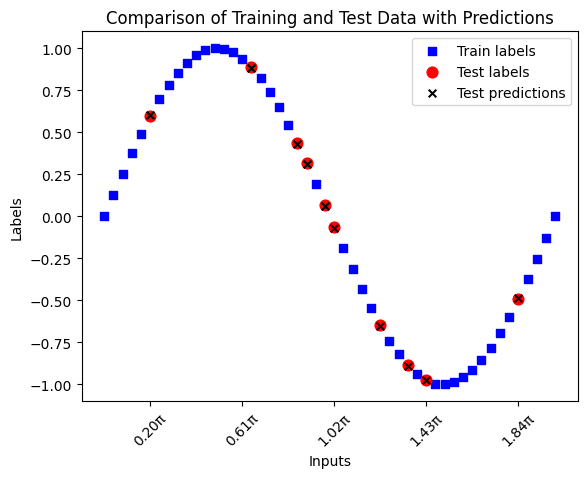

In [11]:
from modules.utils import plot_result
from modules.training import compute_predictions, cost_MSE

test_cost = cost_MSE(final_params, X_test, Y_test)
print(f"Cost (MSE) for training set: {costs[-1]:0.7f}")
print(f"Cost (MSE) for test set: {test_cost:0.7f}")
test_predictions = compute_predictions(X_test, final_params)

plot_result(X_test,Y_test, test_predictions,X_train,Y_train)

Y_train: Length: 800
Y_test: Length: 200
Cost (MSE) for the interval [2π,7π]: 0.0000080


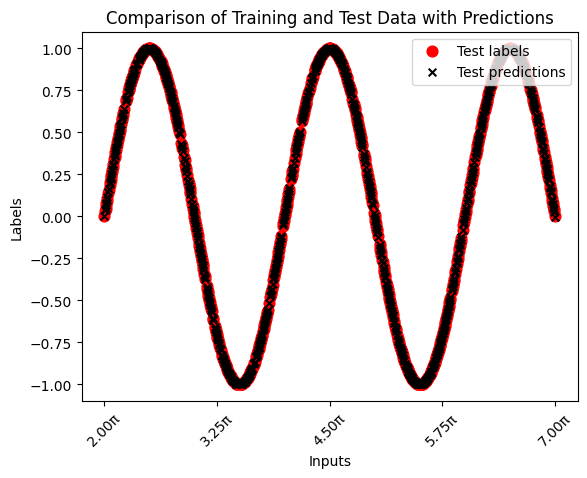

In [12]:
X_test_2, Y_test_2,_,_ = create_data_sin_function(1000,start= 2 * np.pi,stop = 7 * np.pi)
predictions = compute_predictions(X_test_2, final_params)
test_cost = cost_MSE(final_params, X_test_2, Y_test_2)
print(f"Cost (MSE) for the interval [2π,7π]: {test_cost:0.7f}")
plot_result(X_test_2,Y_test_2, predictions)

<a id="5"></a>
### Experiment 2
We change test set's internal into $[2\pi, 7\pi]$.

Y_train: Length: 800
Y_test: Length: 200
Cost (MSE) for the interval [2π,7π]: 0.0000067


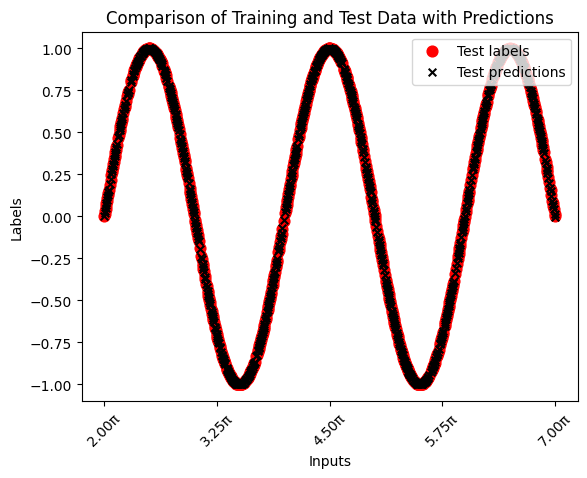

In [10]:
from modules.utils import create_data_sin_function
import pennylane.numpy as np
from modules.training import compute_predictions, cost_MSE
from modules.utils import plot_result

X_test_2, Y_test_2,_,_ = create_data_sin_function(1000,start= 2 * np.pi,stop = 7 * np.pi)

predictions = compute_predictions(X_test_2, final_params)
test_cost = cost_MSE(final_params, X_test_2, Y_test_2)
print(f"Cost (MSE) for the interval [2π,7π]: {test_cost:0.7f}")
plot_result(X_test_2,Y_test_2, predictions)

<a id="6"></a>
### Training for noise function

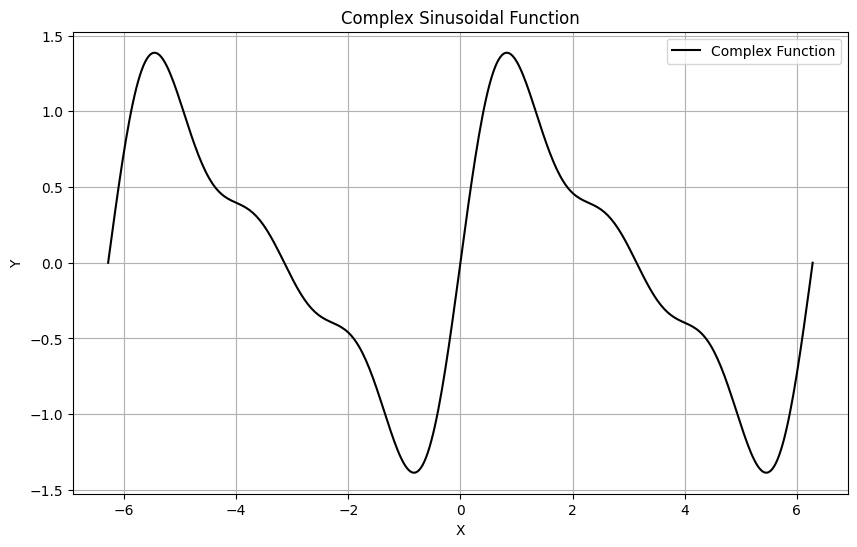

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def complex_function(x):
    return np.sin(x) + 0.5 * np.sin(2 * x) + 0.25 * np.sin(3 * x)

# Generate input data points
x = np.linspace(-2 * np.pi, 2 * np.pi, 400)
y = complex_function(x)

# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(x, y, color='black', label='Complex Function')
plt.title('Complex Sinusoidal Function')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
from modules.utils import create_data_noise_function
X_train, Y_train, X_test, Y_test = create_data_noise_function(100)

Y_train: Length: 80
Y_test: Length: 20


In [14]:
import pennylane as qml
import pennylane.numpy as np
from modules.training import cost_MSE, training

num_epochs = 100
opt = qml.AdamOptimizer(stepsize=0.1)
init_params = np.array([0.1, 0.1], requires_grad=True)

final_params,costs = training(num_epochs, opt, cost_MSE,init_params, X_train, Y_train)

Epoch: 0 | Cost: 1.1600848
Epoch: 1 | Cost: 0.9653349
Epoch: 2 | Cost: 0.7747429
Epoch: 3 | Cost: 0.5971333
Epoch: 4 | Cost: 0.4411974
Epoch: 5 | Cost: 0.3146275
Epoch: 6 | Cost: 0.2229920
Epoch: 7 | Cost: 0.1684943
Epoch: 8 | Cost: 0.1489916
Epoch: 9 | Cost: 0.1578596
Epoch: 10 | Cost: 0.1851840
Epoch: 11 | Cost: 0.2200829
Epoch: 12 | Cost: 0.2531476
Epoch: 13 | Cost: 0.2779357
Epoch: 14 | Cost: 0.2912240
Epoch: 15 | Cost: 0.2924578
Epoch: 16 | Cost: 0.2829567
Epoch: 17 | Cost: 0.2651995
Epoch: 18 | Cost: 0.2422685
Epoch: 19 | Cost: 0.2174169
Epoch: 20 | Cost: 0.1937078
Epoch: 21 | Cost: 0.1736955
Epoch: 22 | Cost: 0.1591573
Epoch: 23 | Cost: 0.1509102
Epoch: 24 | Cost: 0.1487609
Epoch: 25 | Cost: 0.1516193
Epoch: 26 | Cost: 0.1577699
Epoch: 27 | Cost: 0.1652409
Epoch: 28 | Cost: 0.1721842
Epoch: 29 | Cost: 0.1771784
Epoch: 30 | Cost: 0.1794013
Epoch: 31 | Cost: 0.1786658
Epoch: 32 | Cost: 0.1753415
Epoch: 33 | Cost: 0.1702005
Epoch: 34 | Cost: 0.1642260
Epoch: 35 | Cost: 0.1584157
Ep

Cost (MSE) for training set: 0.1487370
Cost (MSE) for test set: 0.1788118


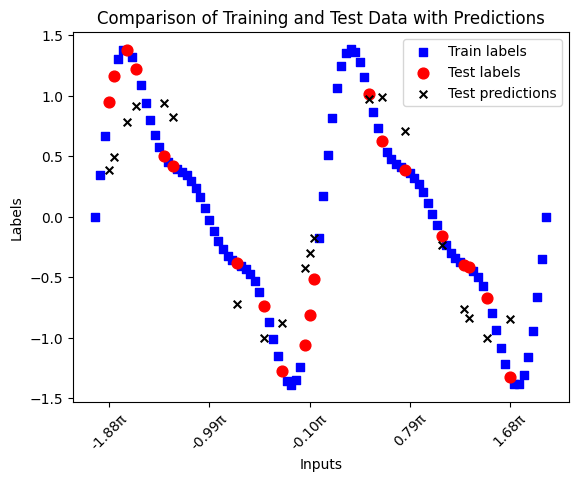

In [15]:
from modules.utils import plot_result
from modules.training import compute_predictions, cost_MSE

test_cost = cost_MSE(final_params, X_test, Y_test)
print(f"Cost (MSE) for training set: {costs[-1]:0.7f}")
print(f"Cost (MSE) for test set: {test_cost:0.7f}")
test_predictions = compute_predictions(X_test, final_params)

plot_result(X_test,Y_test, test_predictions,X_train,Y_train)

Y_train: Length: 800
Y_test: Length: 200
Cost (MSE) for the interval [2π,7π]: 0.1593539


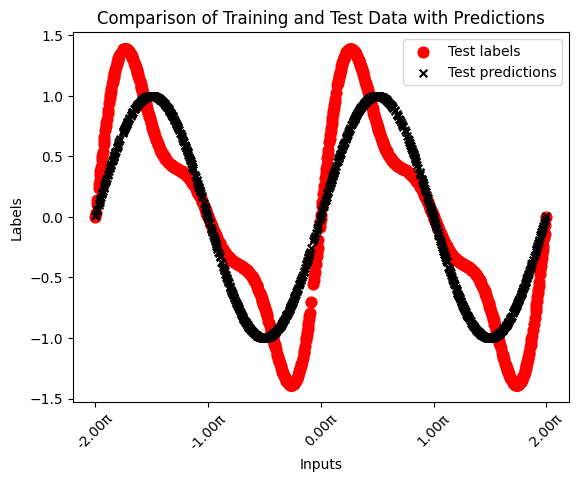

In [16]:
from modules.utils import create_data_sin_function
import pennylane.numpy as np
from modules.training import compute_predictions, cost_MSE
from modules.utils import plot_result

X_test_2, Y_test_2,_,_ = create_data_noise_function(1000,start= 2 * np.pi,stop = 7 * np.pi)

predictions = compute_predictions(X_test_2, final_params)
test_cost = cost_MSE(final_params, X_test_2, Y_test_2)
print(f"Cost (MSE) for the interval [2π,7π]: {test_cost:0.7f}")
plot_result(X_test_2,Y_test_2, predictions)

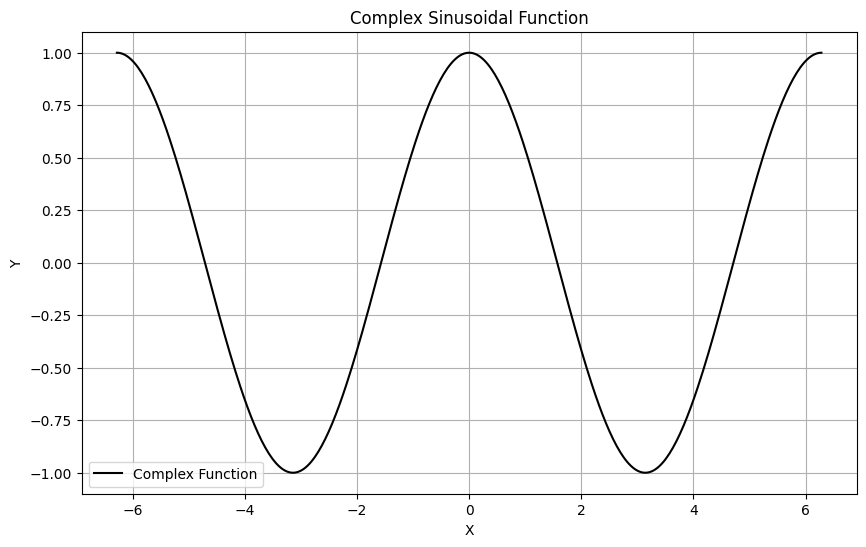

In [18]:
import matplotlib.pyplot as plt
import pennylane.numpy as np
# Generate input data points
x = np.linspace(-2 * np.pi, 2 * np.pi, 400)
y = np.cos(x)

# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(x, y, color='black', label='Complex Function')
plt.title('Complex Sinusoidal Function')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
import pennylane.numpy as np
from modules.training import cost_MSE, training

num_epochs = 20
opt = qml.GradientDescentOptimizer(stepsize=0.1)
init_params = np.array([0.1, 0.1], requires_grad=True)

final_params,costs = training(num_epochs, opt, cost_MSE,init_params, x, y)

Epoch: 3 | Cost: 0.0033875
Epoch: 4 | Cost: 0.0021724
Epoch: 5 | Cost: 0.0013927
Epoch: 6 | Cost: 0.0008927
Epoch: 7 | Cost: 0.0005722
Epoch: 8 | Cost: 0.0003667
Epoch: 9 | Cost: 0.0002350
Epoch: 10 | Cost: 0.0001506
Epoch: 11 | Cost: 0.0000965
Epoch: 12 | Cost: 0.0000618
Epoch: 13 | Cost: 0.0000396
Epoch: 14 | Cost: 0.0000254
Epoch: 15 | Cost: 0.0000163
Epoch: 16 | Cost: 0.0000104
Epoch: 17 | Cost: 0.0000067
Epoch: 18 | Cost: 0.0000043
Epoch: 19 | Cost: 0.0000027
Epoch: 20 | Cost: 0.0000018
Epoch: 21 | Cost: 0.0000011
Epoch: 22 | Cost: 0.0000007
Epoch: 23 | Cost: 0.0000005
Epoch: 24 | Cost: 0.0000003
Epoch: 25 | Cost: 0.0000002
Epoch: 26 | Cost: 0.0000001
Epoch: 27 | Cost: 0.0000001
Epoch: 28 | Cost: 0.0000000
Epoch: 29 | Cost: 0.0000000
Epoch: 30 | Cost: 0.0000000
Epoch: 31 | Cost: 0.0000000
Epoch: 32 | Cost: 0.0000000
Epoch: 33 | Cost: 0.0000000
Epoch: 34 | Cost: 0.0000000
Epoch: 35 | Cost: 0.0000000
Epoch: 36 | Cost: 0.0000000
Epoch: 37 | Cost: 0.0000000
Epoch: 38 | Cost: 0.0000000

In [23]:
from modules.utils import plot_result
from modules.training import compute_predictions, cost_MSE
X_test = np.linspace(-2 * np.pi, 2 * np.pi, 100)
Y_test = np.cos(x)

test_cost = cost_MSE(final_params, X_test, Y_test)
print(f"Cost (MSE) for training set: {costs[-1]:0.7f}")
print(f"Cost (MSE) for test set: {test_cost:0.7f}")
test_predictions = compute_predictions(X_test, final_params)

plot_result(X_test,Y_test, test_predictions)

ValueError: operands could not be broadcast together with shapes (400,) (100,) 

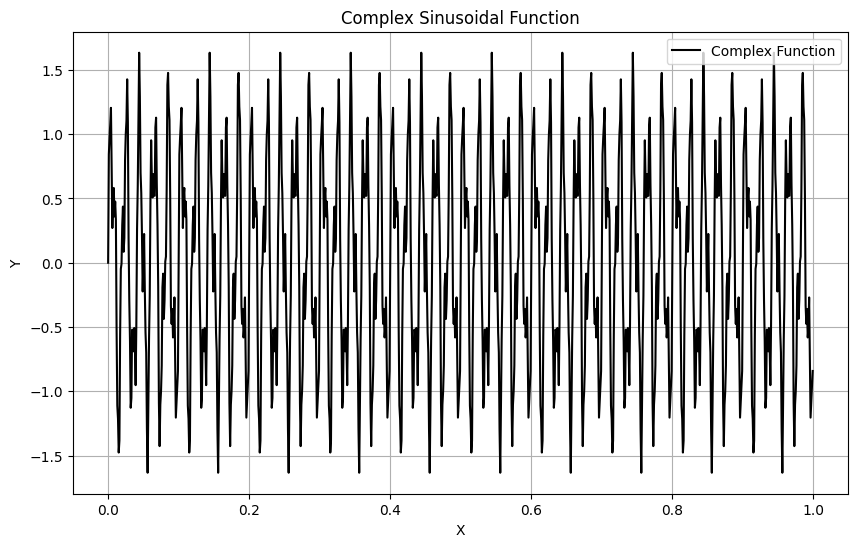

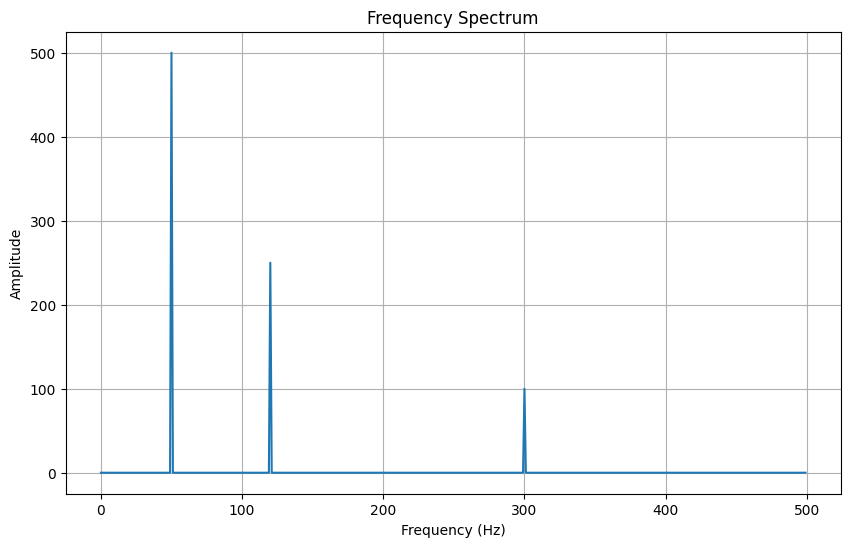

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a sample signal
fs = 1000  # Sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)  # Time array
f1, f2, f3 = 50, 120, 300  # Frequencies of the sine waves
signal = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t) + 0.2 * np.sin(2 * np.pi * f3 * t)

# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(t, signal, color='black', label='Complex Function')
plt.title('Complex Sinusoidal Function')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

# Compute the Fourier Transform
spectrum = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(spectrum), 1/fs)

# Plot the frequency spectrum
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:fs//2], np.abs(spectrum)[:fs//2])  # Plot only the positive frequencies
plt.title('Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()